<a href="https://colab.research.google.com/github/natnew/Python-Projects-Data-Visualisation/blob/main/Data_Science_BootCamp_Working_With_Data_in_Python_Week_8_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This week, we will be attempting some exploratory data analysis, using both non-graphical and
graphical methods. Please work through the following exercises, and then complete the tasks at the 
end of this document

In [1]:
import pandas as pd

In [2]:
!pip install plotnine

## Task 1

In [ ]:
#diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv')

In [3]:
happiness = pd.read_csv('happiness.csv')

In [4]:
print(happiness.head()) 

  Country or region  Score  ...  Generosity  Perceptions of corruption
0           Finland  7.769  ...       0.153                      0.393
1           Denmark  7.600  ...       0.252                      0.410
2            Norway  7.554  ...       0.271                      0.341
3           Iceland  7.494  ...       0.354                      0.118
4       Netherlands  7.488  ...       0.322                      0.298

[5 rows x 8 columns]


In [5]:
print(happiness.shape) 


(156, 8)


If you wish,you may view the data to familiarise yourself with the loaded data. Remember that when 
beginning to explore a new dataset, it is valuable to use the shape function to provide details on the
dimensionality and structure of the data. The shape of happines data is 156 rows and 8 columns. 
Use happiness.head() statement to view the column names. Note that first column shown by the 
pandas dataframe is for indexing only.


Once you have identified the type of data that make up the “happiness” dataset, we will begin to
examine some of the individual features, through univariate analysis. Using ggplot2 provides us with a 
much larger feature set, which allows us to explore the data in more detail. To begin with, we will 
investigate how frequently each scaore of haapiness occurs within the dataset. Use the following
command:

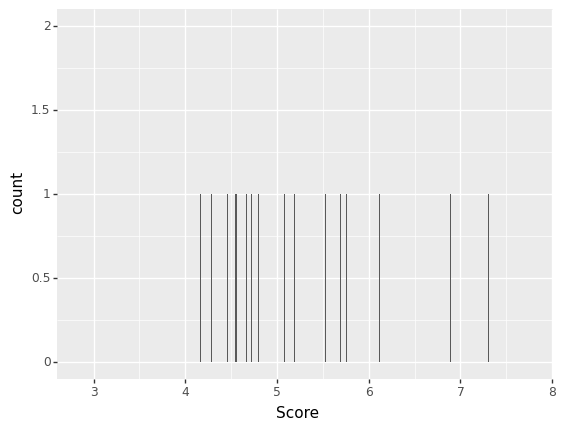

<ggplot: (8741652021073)>

In [6]:
from plotnine import *
ggplot(data = happiness) + geom_bar(mapping = aes(x = 'Score'))

Notice that we conjoin elements within a ggplot2 command using the + symbol. Remember that in this 
case the feature “Scaore” is an ordinal feature, so even though the data is categorical, we can still derive 
information from the distribution that is presented. The bar chart is a 
good way of representing categorical data but is not suitable for continuous data. For that,we must use 
a histogram. As an example, we shall examine the feature “GDP per capita”. Use the following command:


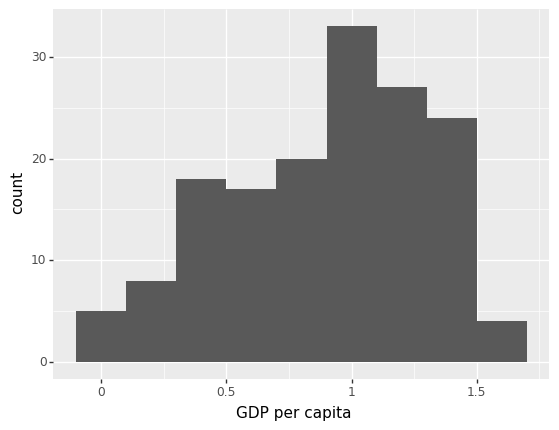

<ggplot: (8741642552665)>

In [72]:
ggplot(data = happiness) + geom_histogram(mapping = aes(x = 'GDP per capita'), binwidth = 0.2)


Note that the term binwidth dictates the width of the bins. A smaller value for binwidth produces a
more granular representation of the data. Try the command below to see how the plot changes:

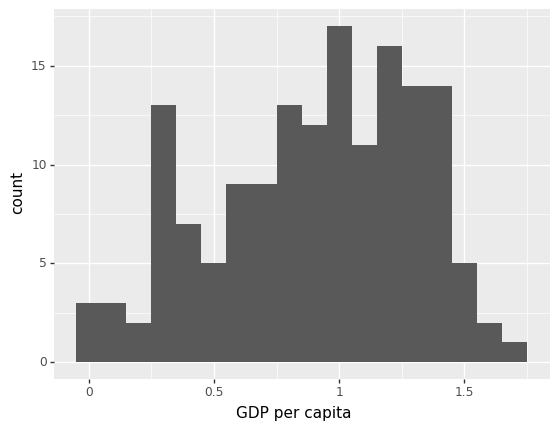

<ggplot: (8741651924653)>

In [73]:
ggplot(data = happiness) + geom_histogram(mapping = aes(x = 'GDP per capita'), binwidth = 0.1)


The bin width should be set at an appropriate size for the purposes of the work that is being
performed. If aesthetics is the priority, then trial and error using various widths can be helpful. In
producing the histogram, two things should become apparent: the first, that the data has an
approximately Poisson distribution, and the second, that there are some outliers. Given these two
facts, a visualisation that will help to further understand the data series is a box plot.


Before we do that however, it is important that we remember never to trust the data implicitly during 
the exploration phases, and to always try to identify the assumptions we are making when dealing 
with any data. Consider the following exercise. First use the following commands to createtwo
samples from the “carat” data series:

In [7]:
#import numpy
import numpy as np

In [8]:
np.random.seed(22)

In [17]:
sample1 = happiness['Score'].sample(n=50,replace=False)


In [23]:
sample2 = happiness['Score'].sample(n=50,replace=False)

Note: the set seed function provides a form of “key” that is used when sampling and sub-setting data, 
in order to better ensure reproducibility. This will be discussed further in future when creatingtraining
and test data from datasets.


After we have the samples, each must be coerced into a data frame format so that ggplot2 is able touse
the data. To achieve this, use the following commands:

In [24]:
sample1_df = sample1.to_frame()

In [25]:
sample2_df = sample2.to_frame()

Now, use the following command to create the histogram for the first sample, and then modify the
code to create the correct histogram for the second sample as well:

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


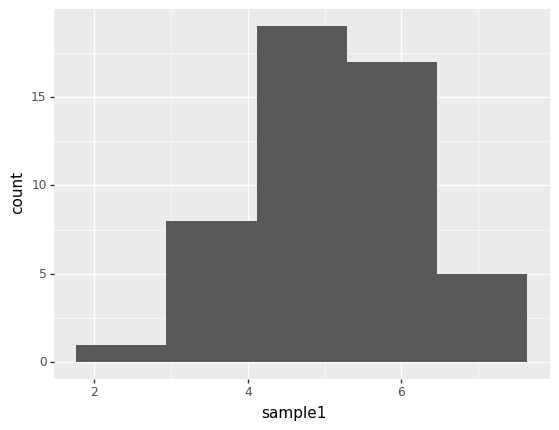

<ggplot: (8741642468129)>

In [26]:
ggplot(data = sample1_df) + geom_histogram(mapping = aes(x = 'sample1', binwidth = 0.1))

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


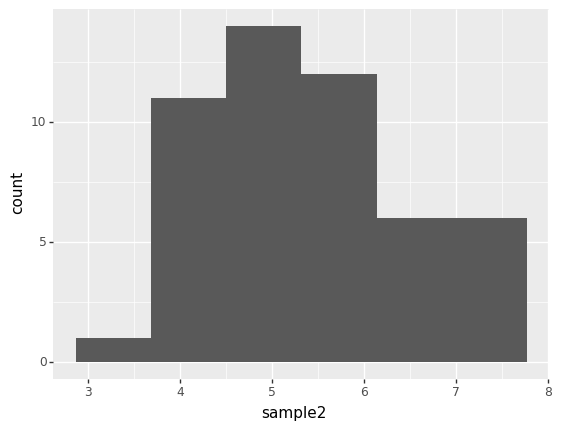

<ggplot: (8741642536321)>

In [27]:
ggplot(data = sample2_df) + geom_histogram(mapping = aes(x = 'sample2', binwidth = 0.1))

You should notice that while the profile of the samples is similar, there will also be many distinct
differences. Consider then that almost all data that you ever handle will be just one sample out of many
possible samples, and the dangers of assuming absolute truth from any data set become clear

Moving back to the box plot, to create this visualisation for the “carat” feature, use the following
command:

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


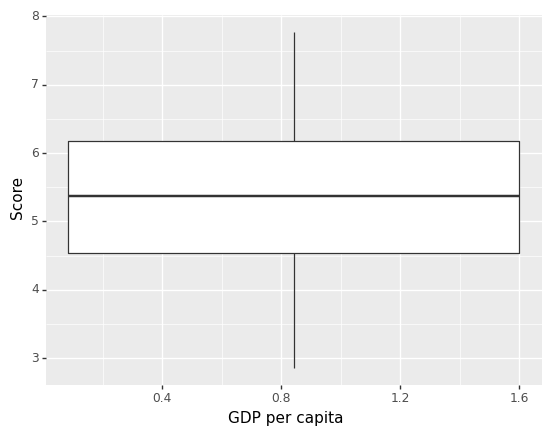

<ggplot: (8741642257493)>

In [48]:
ggplot(data = happiness) + geom_boxplot(mapping = aes(x='GDP per capita',y = 'Score'))
#(x='Score',y = 'GDP per capita'))

Notice that the outliers that we identified are clearly shown beyond the boundaries of the
“whisker”. To make them stand out even more, use the following command:

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


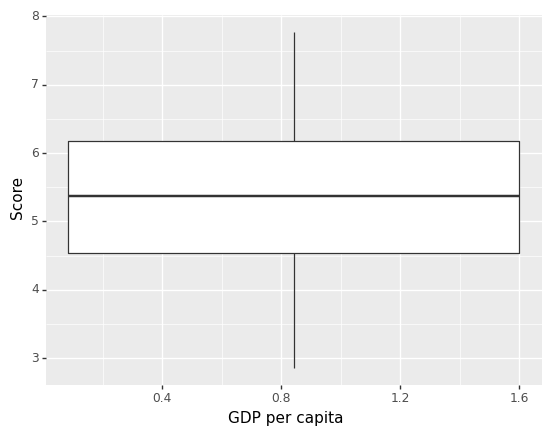

<ggplot: (8741642377045)>

In [47]:
ggplot(data = happiness) + geom_boxplot(mapping = aes(x='GDP per capita',y = 
'Score'),outlier_colour="red")

The presence of those outliers is intriguing. Let us try and establish whether these very high-carat
diamonds have an equivalently high price, by creating a scatter plot mapping the two features.  Use the following command:


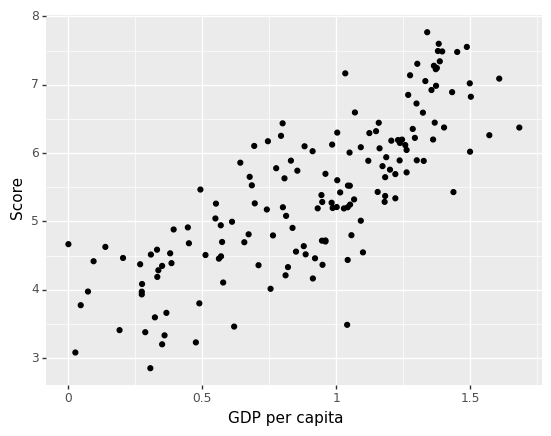

<ggplot: (8741642257529)>

In [46]:
ggplot(data = happiness) + geom_point(mapping = aes(x = 'GDP per capita', y = 'Score'))


We can see that there is a huge amount of variance among happiness. This 
suggests that there may be one or more additional features responsible for this variance. Usingggplot2 
allows us to add further dimensions into a two-dimensional plot through the use of pre- attentive 
attributes, such as healthy life expectancy and perception of corruption. For this task, we shall use different colours to map happiness onto the scatter plot, using the following command:

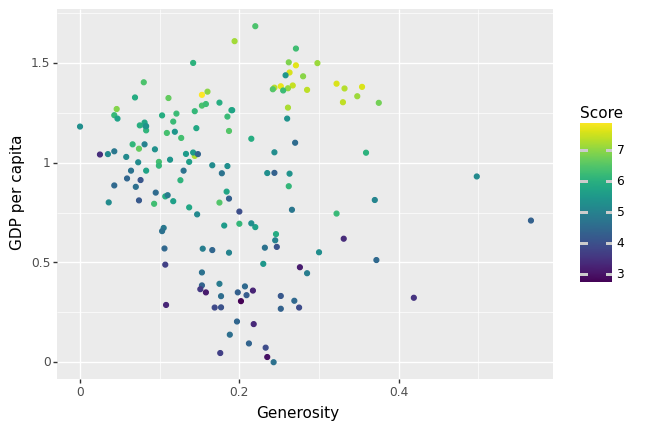

<ggplot: (8741652021241)>

In [45]:
ggplot(data = happiness) + geom_point(mapping = aes(x = 'Generosity', y = 'GDP per capita', color = 'Score'))


Now we can see that in fact price appears to be a function of carat and the quality of cut. The
discovery of this relationship is why multivariate EDA is so powerful. If we were to build a model totry 
and predict the price of diamonds, we now know that “carat” and “cut” are two of the featuresthat
should be selected for inclusion.

When performing multivariate EDA, we will sometimes have to analyse the relationship between two 
categorical features, which prohibits the use of scatter plots. One method that we can use in lieu are 
frequency plots, which present a grid representing the possible combinations of two categorical 
features, with the size of objects in the plot showing the frequency occurrence of each.To identify the 
spread of observations between category combinations of cut and clarity, use the following
command:

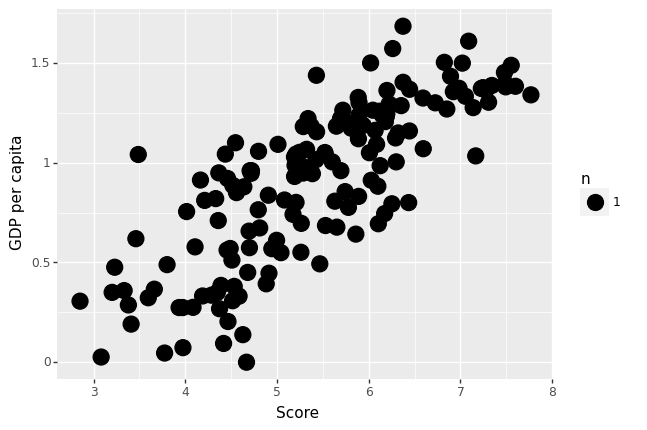

<ggplot: (8741651904741)>

In [44]:
ggplot(data = happiness) + geom_count(mapping = aes(x = 'Score', y= 'GDP per capita'))

Notice that the larger “nodes” signify the most frequent combinations.

## Task 2

One important part of EDA is the identification of correlations between the independent and
dependent features, and covariance between independent features in the dataset. A method that can 
be used to achieve this is the production of correlation matrix, in a either a non-graphical or graphical 
format. An issue that we face, however, is the presence of categorical features within the data, which 
will inhibit the production of a correlation matrix. Fortunately, the features in question (“cut”, “color” 
and “clarity”) are ordinal, meaning that they have a natural order, and can therefore be coded as 
natural numbers. By default, they should be stored as factors, but we will convert themto integers.

Whenever this form of transformation is applied, it is essential that the data is investigated thoroughly, 
and appropriate domain knowledge utilised, to ensure that there are no unintended consequences. 
For example, when performing correlation analysis, we need to the directionality ofall the feature to 
be the same (i.e. “carat” becomes a ‘better’ value as it rises, as does price). Using the 
diamonds.describe() function to examine the data, it can be seen that the level order for the factors of 
“cut” and “clarity” possess this appropriate directionality, where the lower levels correspond with a 
less desirable category. However, this directionality is reversed for the feature “color”, where the 
lowerlevels correspond to a more desirable trait (i.e. less colour contamination). 


In [55]:
happiness.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Once that has been taken care of, we can convert the factors to natural numbers. For the feature
“color”, we can perform this transformation using the following command:

In [57]:
#happiness['color'] = diamonds['color'].astype('category')
#happiness['color'] = diamonds['color'].cat.codes

In [56]:
print(happiness.head()) 

  Country or region  Score  ...  Generosity  Perceptions of corruption
0           Finland  7.769  ...       0.153                      0.393
1           Denmark  7.600  ...       0.252                      0.410
2            Norway  7.554  ...       0.271                      0.341
3           Iceland  7.494  ...       0.354                      0.118
4       Netherlands  7.488  ...       0.322                      0.298

[5 rows x 8 columns]


When viewing the data, you will see that “color” is now represented numerically. Now, adapt the
command above to apply the same transformation for “clarity” and “cut”.

In [58]:
#happiness['clarity'] = happiness['clarity'].astype('category')
#happiness['clarity'] = happiness['clarity'].cat.codes

In [59]:
#happiness['cut'] = happiness['cut'].astype('category')
#happiness['cut'] = happiness['cut'].cat.codes

In [60]:
print(happiness.head()) 

  Country or region  Score  ...  Generosity  Perceptions of corruption
0           Finland  7.769  ...       0.153                      0.393
1           Denmark  7.600  ...       0.252                      0.410
2            Norway  7.554  ...       0.271                      0.341
3           Iceland  7.494  ...       0.354                      0.118
4       Netherlands  7.488  ...       0.322                      0.298

[5 rows x 8 columns]


To create a correlation matrix, showing the Pearson correlation coefficients between the features,we
can use the corr function of the Pandas dataframe. Use the following command:


In [61]:
corr = happiness.corr(method = "pearson")
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Notice that the “method” parameter allows for the measure of correlation to be set. While the
correlation matrix that is printed to the console illustrates those raw figures, it does not present the
best platform for the identification of patterns and trends. For that, a more graphical approach should 
be employed. A useful package that provides this functionality is statistical data visualization 
(seaborn) and matplotlib. Usethe following commands to download and install the package, and 
produce a visualisation that can be used for effective graphical EDA:

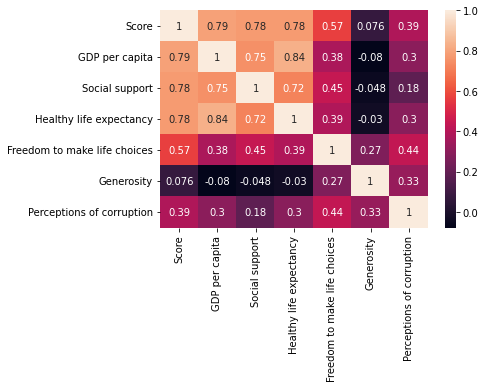

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap = sns.heatmap(corr, annot=True)
plt.show()

The components of the plot can be broken down as follows:<br>
• The plot shows a 10 x 10 square matrix and color-fills each cell based on the correlation coefficient 
between two variables.<br>
• The values inside the cells represents the correlation coefficients between each pair of features and 
the significance of each. A strong positive correlation is generally given to be any coefficient value 
of greater than 0.6 (and likewise, a strong negative coefficient can be considered to be any value 
lower than - 0.6). The corresponding correlation coefficient for carat and price is indicated by the 
‘new colonial yellow’ box, on the figure above.<br>
• Using this form of graphical EDA is an effective means for discovering potential predictors and
identifying covariates. Let us assume that we are building a model which aims to predict diamond
price, therefore using that feature as the response variable. As was identified earlier, carat is
strongly correlated, but so are the features “x”, “y” and “z”. These features relate to the physical
dimensions of the diamond, in the x, y and z planes. However, we can see that all three are highly
correlated covariates of each other and may therefore cause issues with multicollinearity. Because
of the high degree of interdependency however, there is very little information lost when two of 
the features are stripped from the dataset, so that would be the recommended course of action, 
prior to any model development taking place. Some covariance can be tolerated between 
independent features, but correlation coefficients in excess of around 0.8 (or -0.8) should certainly
warrant further attention.

Notice that we should not discount features just because they are not strongly correlated with the
response variable. As we saw earlier in the workshop, while the cut of a diamond is not necessarily a
strong predictor of price in isolation, it would appear to be a moderator between carat and price and
should therefore be included in any model that is developed

The final graphical EDA method that we will explore today is the quantile-normal plot. This plot is used 
to detect how close to approximating a normal distribution the data within a particular featureare, and 
hence act as a guide to whether certain assumptions have been met, and which techniquesare available 
for use. To produce a quantile-normal for the “depth” feature, use the following commands:


In [63]:
!pip install seaborn_qqplot

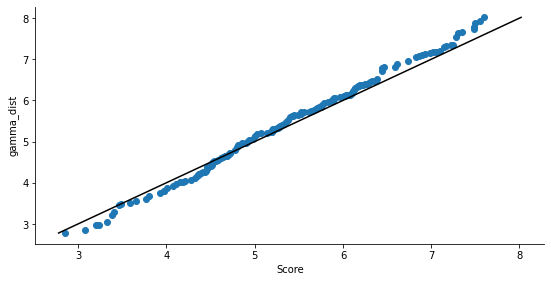

In [67]:
from seaborn_qqplot import pplot
from scipy.stats import gamma
pplot(happiness, x="Score", y=gamma, kind='qq', height=4, aspect=2, 
display_kws={"identity":True})

Notice that the line created using the ‘identity:True’ parameter signifies a normal distribution, and 
any deviation from this line shows non-normality. Adapt the above commands for the “carat” 
feature.What do you notice? Which features follows the normal distribution most closely?


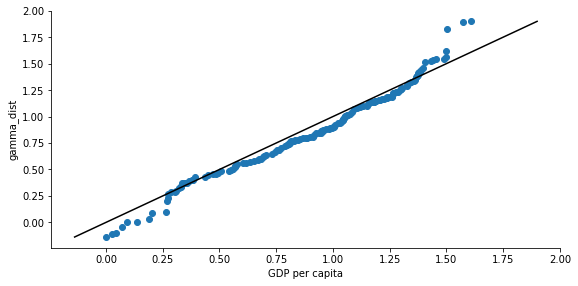

In [66]:
pplot(happiness, x="GDP per capita", y=gamma, kind='qq', height=4, aspect=2, 
display_kws={"identity":True})

## Task 3

For the tasks below, happiness.csv is provided, and load it as Pandas dataframe. Remove the feature
containing the country names.

1. Perform some univariate EDA on the features within the dataset. Complete the table below
(the first row has been pre-completed)

2) Produce a correlation chart for the dataset. When developing a model to predict the overall
satisfaction score:<br>
a. Which features would act as the strongest predictor?<br>
b. Which features may you wish to remove from the dataset, and why? <br>
3) Explain how the techniques covered in this week, and in previous weeks, can help to satisfy:<br>
a. The assumption of feature independence.<br>
b. The assumption of observational independence.<br>
c. The assumption of the approximation of nor<br>
d. The assumption of accurate data